In [19]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats import norm
palette = ['#001A72', '#FC4C02', '#41B6E6', '#B7C01B', '#00D4C5', '#00A499', '#DBE442']
bg = '#EBF6F3'
np.random.seed(42)
plt.rcParams.update({'axes.facecolor':bg})
plt.rcParams['axes.prop_cycle'] = cycler(color=palette)
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.grid'] = True

# Statistical Inference

Probability theory and Statistical Inference are complementary tools that we use to study aleatory and noisy behaviours.

In Probability Theory, we use the rules of probability to build a model of a object we want to study, and then we use this model to deduce what is going to happen when we run an experiment on it. This is a deductive process. 

In statistical inference, on the other hand, we observe the results of an experiment ran on the object we are studying and, after making some assumptions on its behaviour, we want to use them to learn something about it.

As an example, consider a coin as a the object of study. We assume that the probability of landing head when tossed is 70% (the coin is rigged). Then, using probability theory, we can deduce other things: for example that the probability of landing tails is 30%, that the probability of landing two heads in a row in 14%, and so on. This is a typical example of the deductive process conducted using probability theory.

On the other hand, suppose you are given a coin that you don't know and you want to know whether it's rigged. You might assume a few things about it: for example that the probability of getting head if you toss it doesn't change over time; that the result of each toss does not influence the others, and so on. Then you conduct an experiment, and toss it 100 times, getting 35 heads. What do you conclude? Is the coin rigged? This is the kind of question that statistical inference can help you answer.


## Theoretical Foundations

### Experiments, Models and Random Variables

Usually we model the data coming from an experiment as a sequence of independent and identically distributed (from now on, i.i.d.) Random Variables, $X_1, X_2,  ..., X_n$. We will make some assumptions about the properties of these Random Variables, and usually try to learn something about them, usually by calculating a *statistic* $t = T(X_1, X_2,  ..., X_n)$, a function of the data that summarises some quantity of information useful for us. Note that the statistic is itself a random variable.

An example of a statistic is the sample mean:

$
    \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}
$

But before we start doing that, we need some basic results about the asymptotic behaviour of random variables. The first theorem will tell us that the sample mean, when the sample is very big, converges (defining what this means exactly gets very complicated very quickly; read it as "gets very close to") the mean of the Random Variable. The second results will give us more details about the convergences, telling us how large are the fluctuations around the limit while the sample grows.

### The Strong Law of Large Numbers

Let $(X_i)_{i \in \mathbb{N}}$ be a sequence of i.i.d. Random Variables. Suppose that $\mathbb{E}[X_1] = \mu$ and $\mathbb{V}[X_1] = \sigma < \infty$. Then, with probability 1, $\bar{X} \rightarrow \mu$ as $n \rightarrow \infty$.


Thanks to Python, we don't have to trust this. We can actually try it out. Let's see if this holds. Using NumPy Random library, we can model a random variable $X$ with the following behaviour:

$$
\mathbb{P}[X = 1] = 0.5 \newline
\mathbb{P}[X = -2] = 0.5
$$

We can easily see that:

$$
\mu = \mathbb{E}[X] = -.0.5  \newline
\sigma = \mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = 2.5 - .25 = 2.25
$$

In [61]:
n = 300
possible_results = [1, -2]
sigma = np.sqrt((np.square(possible_results - mu)).mean())
mu = np.mean(possible_results)

We can then look at how the sample mean of the sample changes while n grows:

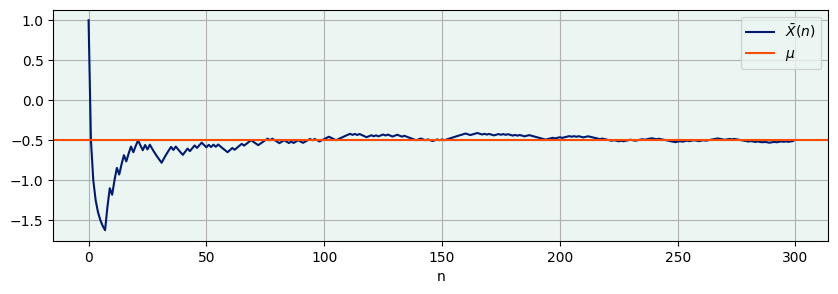

In [63]:


X_i = np.random.choice(possible_results, size = n)
plt.plot(X_i.cumsum()/np.arange(1, n + 1), label = r'$\bar{X}(n)$')
plt.axhline(np.mean(possible_results), color = palette[1], label = r'$\mu$');
plt.legend();
plt.xlabel("n");

In the plot, we see exactly the kind of behaviour described by the SLLN: as n grows, the sample mean taken from the i.i.d. Random Variables converges to the expected value $\mu$. This is extremely important, as notice what we are saying: if we are given a sample that is big enough, we are guaranteed to learn something about the Random Variables we are studying, i.e., their expected value. As we are using Random Variables to model the world, this means we can learn something about the world through this procedure. This theorem lies at the centre of Statistical Inference.

However, the SLLN only tells us that we'll learn something as n becomes very, very large. It does not tell us how large it needs to be to get to a certain precision in our estimates. For that, we need another theorem.

### Central Limit Theorem

Using the setting from the theorem above, we also have:

$$
    X_1 + X_2 + ... + X_n \sim \mathcal{N}(n\mu, n\sigma^2)
$$

as $n \rightarrow \infty$. Technically, what we have in this theorem in a convergence in distribution. Without going into too much technical details, what this means is that with a large enough n, we can make approximate probability statements about the sum of the Random Variables.

In [64]:
N = 1000
xs = np.random.choice(possible_results, size = (N, n))

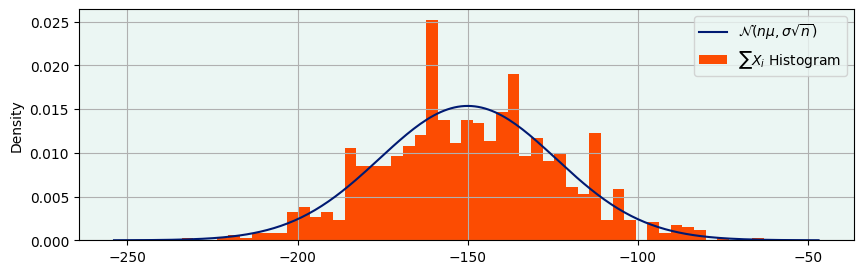

In [67]:
xs_sum = xs.cumsum(axis = 1)
sum_mean = n*mu
sum_sigma = np.sqrt(n)*sigma
rng = np.arange(sum_mean - 4*sum_sigma, sum_mean + 4*sum_sigma)
plt.plot(rng, norm.pdf(rng,sum_mean,sum_sigma), label = r'$\mathcal{N}(n\mu, \sigma\sqrt{n})$')
plt.hist(xs_sum[:, -1], bins = 50, density = True, label = r'$\sum{X_i}$' + " Histogram");
plt.legend()
plt.ylabel("Density");

Before looking at how this theorem is useful for statistical inference, we can notice that even just this first results gives us a lot of insight on one possible way normal distributions can arise. Whenever we have an outcome that is the result of a lot of individual random contributions being summed up, we tend to get a Normal distribution as a result. 

If we go back to our definition of the sample mean, we see that it involves a sum. Can we then use the CLT to infer something about the behaviour of the sample mean as n gets large? We can. By using some basic properties of Random Variables, we get:

$$
    \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt n}} \sim \mathcal{N}(0, 1)
$$

In fact, this one, and not the previous one, is the precise statement of the CLT. We can then use this to understand how we can tune our sampling to get an approximation that matches our needs.

In [68]:
xs_means = xs_sum/(np.arange(1, n + 1).reshape(1, n))

We can then use the theorem to trace the theoretical distributional trends of the convergence as n grows. We can check this, computationally, by considering many samples (N = 1000) and looking at how their sample mean changes as n grows:

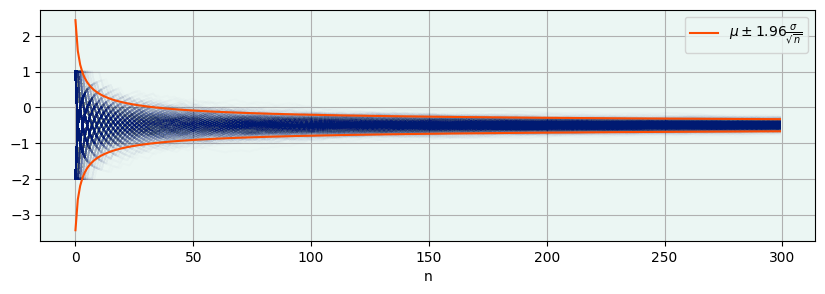

In [69]:
_, ax = plt.subplots()
for i in range(N):
    plt.plot(xs_means[i, :], color = palette[0], alpha = 0.01)
plt.plot(mu + 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[1], label = r'$\mu \pm 1.96\frac{\sigma}{\sqrt{n}}$');
plt.plot(mu - 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[1]);
plt.legend();
plt.xlabel("n");

Finally, we can see the distribution of the sample means for n = 300:

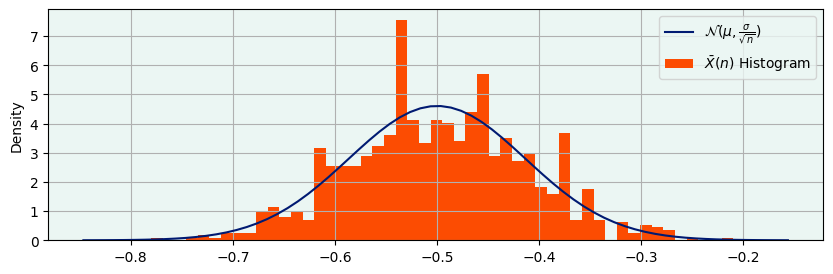

In [70]:
mean_mean = mu
mean_sigma = sigma/np.sqrt(n)
rng = np.arange(mean_mean - 4*mean_sigma, mean_mean + 4*mean_sigma, 0.01)

plt.plot(rng, norm.pdf(rng,mean_mean,mean_sigma), label = r'$\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$')
plt.hist(xs_means[:, -1], bins = 50, density = True, label = r'$\bar{X}(n)$' + " Histogram");
plt.legend();
plt.ylabel("Density");

Let's reflect on what we achieved:

* We discovered that if we have a large enough sample of i.i.d. random variables, the sample mean will be close enough to the expectation of the random variables.
* We also discovered what "close enough" means: the distribution of the sample means is a Normal, centered around the mean mu, and with variance inversely proportional to the square root of n.